In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_curve
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from matplotlib import pyplot
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# MAKING DATAFRAMES

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/sample_data.csv')

In [ ]:
df.head

<bound method NDFrame.head of                                 text label
0                      zucker fabrik    ft
1       Lebensmittel kommssionierung    ft
2                    geländer biegen    mr
3       gebäudeausrüstung technische    ct
4              kürbiskernöl softgels    ft
...                              ...   ...
37290      spirituosen dienstleister    ft
37291         mini hydraulikzylinder    ct
37292  blockbodenbeutel verpackungen   pkg
37293            Drehteile verpacken    mr
37294                   bagger tanks    ct

[37295 rows x 2 columns]>

In [ ]:
df.isnull().sum()

text       0
label    100
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
c = 0
for i in df.text:
  if i == ' ':
    c += 1
    # print(i)

print(c)

300


In [ ]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
df.shape

(37195, 2)

In [ ]:
df.nunique()

text     35403
label        6
dtype: int64

# Visualization

In [ ]:
df.dtypes

text     object
label    object
dtype: object

<Axes: xlabel='label', ylabel='count'>

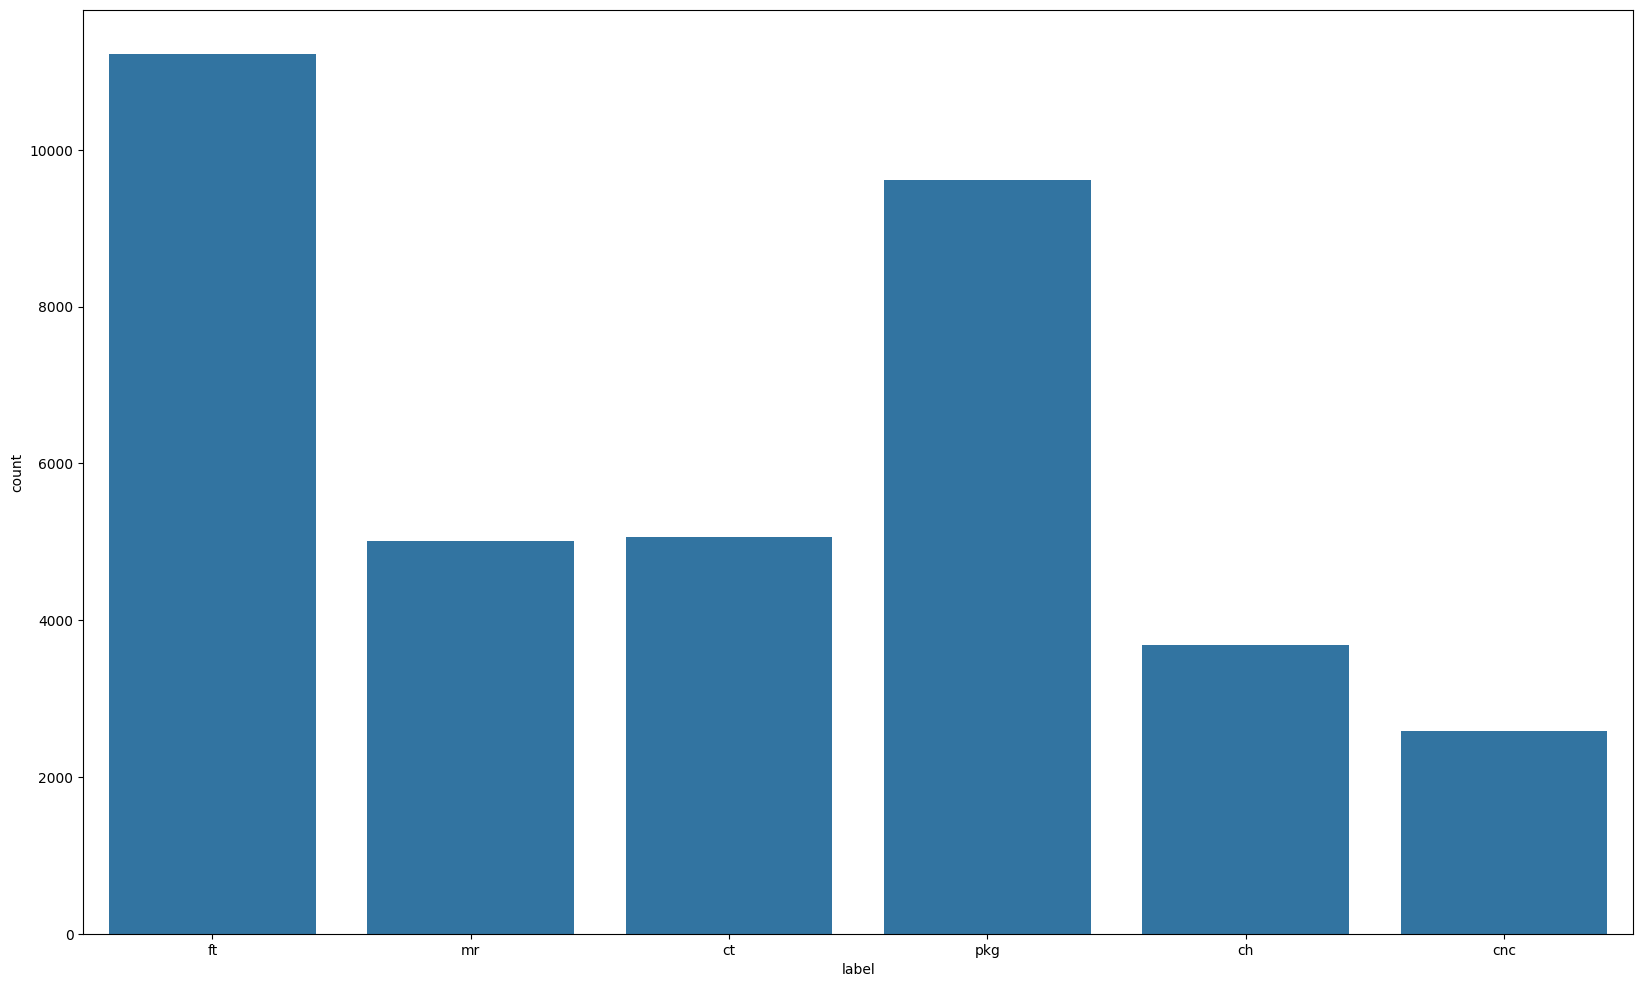

In [ ]:
a4_dims = (20, 12)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.countplot(ax=ax, x='label', data=df)

# TOKENIZATION

In [ ]:
'''This area of code convert all the text into a single list with the help of this we can remove
stopwords and punctuation marks...  '''

import nltk
from nltk.tokenize import word_tokenize as WordTokenizer
token={}
content = df['text']
nltk.download('punkt')
for k, row in enumerate(content):
    token[k]= WordTokenizer(row)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
max = 0
for lst in token.values():
  if len(lst) > max:
    max = len(lst)

print(max)

111


In [ ]:
len(df['text'].unique())

35403

In [ ]:
len(df['label'].unique())

6

# DIVIDING DATASET TO DATA AND ITS LABELS

In [ ]:
X = df['text']
y= df['label']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X1 = vectorizer.fit_transform(X)

In [ ]:
X1[0]

<1x20396 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

# DATA SPLITTING

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.20, random_state = 0, stratify = y)

# NAIVE BASE CLASSIFIER

In [ ]:
parameters = {'alpha':[0.01,0.0001,0.1,1,2] }

clf = MultinomialNB()
clf = GridSearchCV(clf, parameters, cv =5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.0001, 0.1, 1, 2]})

In [ ]:
print("Best cross-validation accuracy: {:.2f}".format(clf.best_score_))
print("Test set score: {:.2f}".format(clf.score(X_test, y_test)))
print("Best parameters: {}".format(clf.best_params_))

Best cross-validation accuracy: 0.86
Test set score: 0.87
Best parameters: {'alpha': 1}


In [ ]:
y_pred_nv = clf.predict(X_test)

In [ ]:
for i, j in zip(y_test, y_pred_nv):
    print("actual:", i, " pred:", j)

Streaming output truncated to the last 5000 lines.
actual: ft  pred: ft
actual: pkg  pred: pkg
actual: ft  pred: ft
actual: ft  pred: ft
actual: mr  pred: mr
actual: pkg  pred: pkg
actual: ft  pred: ft
actual: pkg  pred: pkg
actual: ft  pred: ft
actual: ft  pred: ft
actual: ft  pred: ft
actual: ch  pred: ch
actual: pkg  pred: pkg
actual: ct  pred: ct
actual: ct  pred: ct
actual: pkg  pred: pkg
actual: mr  pred: cnc
actual: pkg  pred: pkg
actual: mr  pred: mr
actual: pkg  pred: pkg
actual: ft  pred: ft
actual: ft  pred: ft
actual: ft  pred: ft
actual: ft  pred: ft
actual: pkg  pred: pkg
actual: pkg  pred: pkg
actual: mr  pred: mr
actual: mr  pred: mr
actual: ct  pred: ct
actual: ft  pred: ft
actual: ct  pred: ct
actual: pkg  pred: pkg
actual: cnc  pred: cnc
actual: pkg  pred: pkg
actual: ft  pred: ft
actual: ft  pred: ft
actual: ft  pred: ft
actual: mr  pred: mr
actual: pkg  pred: pkg
actual: ft  pred: ft
actual: pkg  pred: pkg
actual: pkg  pred: pkg
actual: mr  pred: mr
actual: pkg  pr

<Axes: xlabel='Predicted', ylabel='Actual'>

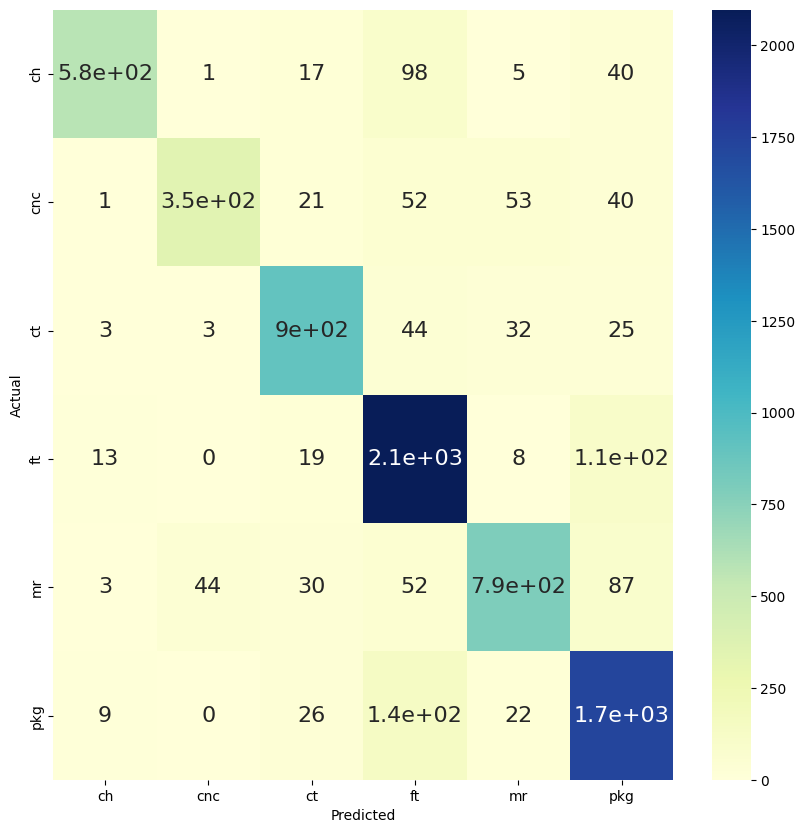

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred_nv)
df_cm = pd.DataFrame(conf_mat, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
seaborn.heatmap(df_cm,cmap= "YlGnBu", annot=True,annot_kws={"size": 16})
# # plt.savefig("bayes confusion")

In [ ]:
print(classification_report(y_test, y_pred_nv))

              precision    recall  f1-score   support

          ch       0.95      0.78      0.86       738
         cnc       0.88      0.68      0.77       517
          ct       0.89      0.89      0.89      1012
          ft       0.84      0.93      0.89      2245
          mr       0.87      0.78      0.82      1003
         pkg       0.85      0.90      0.87      1924

    accuracy                           0.87      7439
   macro avg       0.88      0.83      0.85      7439
weighted avg       0.87      0.87      0.86      7439



# RANDOM FOREST CLASSIFIER

In [ ]:
parameters = {'n_estimators':[10,100,200],  'max_depth':[2,3,4]}

clf = RandomForestClassifier()

clf = GridSearchCV(clf, parameters, cv =5)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4],
                         'n_estimators': [10, 100, 200]})

In [ ]:
print("Best cross-validation accuracy: {:.2f}".format(clf.best_score_))
print("Test set score: {:.2f}".format(clf.score(X_test, y_test)))
print("Best parameters: {}".format(clf.best_params_))

Best cross-validation accuracy: 0.34
Test set score: 0.36
Best parameters: {'max_depth': 4, 'n_estimators': 10}


In [ ]:
y_pred_rf = clf.predict(X_test)
for i, j in zip(y_test, y_pred_rf):
    print("actual:", i, " pred:", j)

Streaming output truncated to the last 5000 lines.
actual: ft  pred: ft
actual: pkg  pred: pkg
actual: ft  pred: ft
actual: ft  pred: ft
actual: mr  pred: ft
actual: pkg  pred: pkg
actual: ft  pred: ft
actual: pkg  pred: ft
actual: ft  pred: ft
actual: ft  pred: ft
actual: ft  pred: ft
actual: ch  pred: ft
actual: pkg  pred: ft
actual: ct  pred: ft
actual: ct  pred: ft
actual: pkg  pred: ft
actual: mr  pred: ft
actual: pkg  pred: ft
actual: mr  pred: ft
actual: pkg  pred: ft
actual: ft  pred: ft
actual: ft  pred: ft
actual: ft  pred: ft
actual: ft  pred: ft
actual: pkg  pred: ft
actual: pkg  pred: ft
actual: mr  pred: ft
actual: mr  pred: ft
actual: ct  pred: ft
actual: ft  pred: ft
actual: ct  pred: ft
actual: pkg  pred: ft
actual: cnc  pred: ft
actual: pkg  pred: ft
actual: ft  pred: ft
actual: ft  pred: ft
actual: ft  pred: ft
actual: mr  pred: ft
actual: pkg  pred: pkg
actual: ft  pred: ft
actual: pkg  pred: ft
actual: pkg  pred: ft
actual: mr  pred: ft
actual: pkg  pred: ft
actual

<Axes: xlabel='Predicted', ylabel='Actual'>

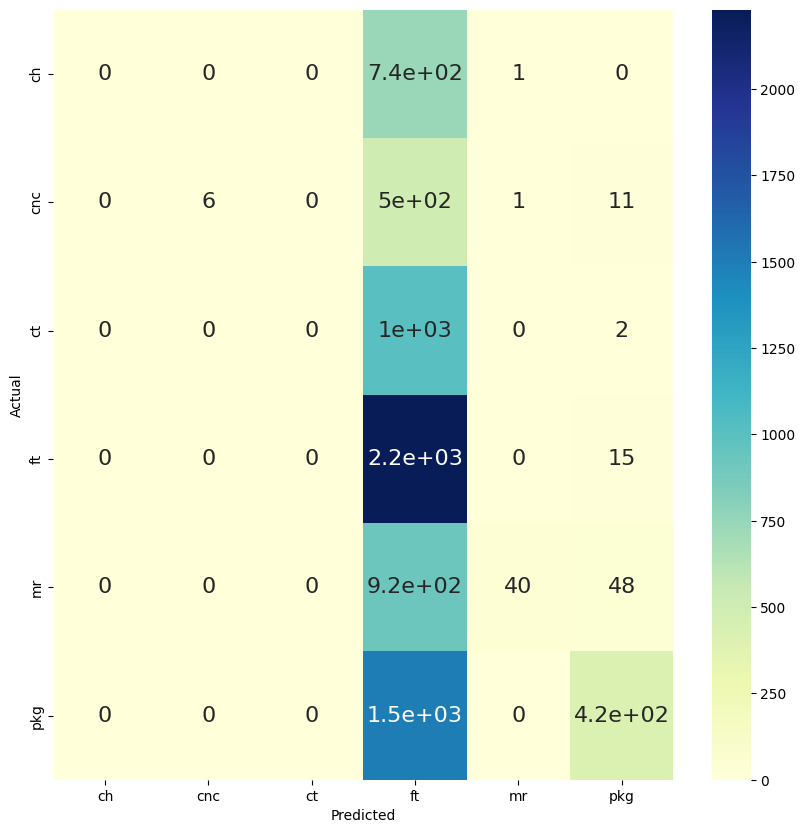

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred_rf)
df_cm = pd.DataFrame(conf_mat, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
seaborn.heatmap(df_cm,cmap= "YlGnBu", annot=True,annot_kws={"size": 16})

In [ ]:
print(classification_report(y_test, y_pred_rf))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          ch       0.00      0.00      0.00       738
         cnc       1.00      0.01      0.02       517
          ct       0.00      0.00      0.00      1012
          ft       0.32      0.99      0.49      2245
          mr       0.95      0.04      0.08      1003
         pkg       0.85      0.22      0.35      1924

    accuracy                           0.36      7439
   macro avg       0.52      0.21      0.16      7439
weighted avg       0.51      0.36      0.25      7439



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM

In [ ]:
parameters = {'kernel':['linear'],
              'C':[1,2],
              'decision_function_shape' : ['ovo']}
svc = SVC()
clf = GridSearchCV(svc, parameters, cv =5)
clf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2], 'decision_function_shape': ['ovo'],
                         'kernel': ['linear']})

In [ ]:
print("Best cross-validation accuracy: {:.2f}".format(clf.best_score_))
print("Test set score: {:.2f}".format(clf.score(X_test, y_test)))
print("Best parameters: {}".format(clf.best_params_))

Best cross-validation accuracy: 0.88
Test set score: 0.88
Best parameters: {'C': 1, 'decision_function_shape': 'ovo', 'kernel': 'linear'}


In [ ]:
y_pred_svm = clf.predict(X_test)
# for i, j in zip(y_test, y_pred_svm):
#     print("actual:", i, " pred:", j)

<Axes: xlabel='Predicted', ylabel='Actual'>

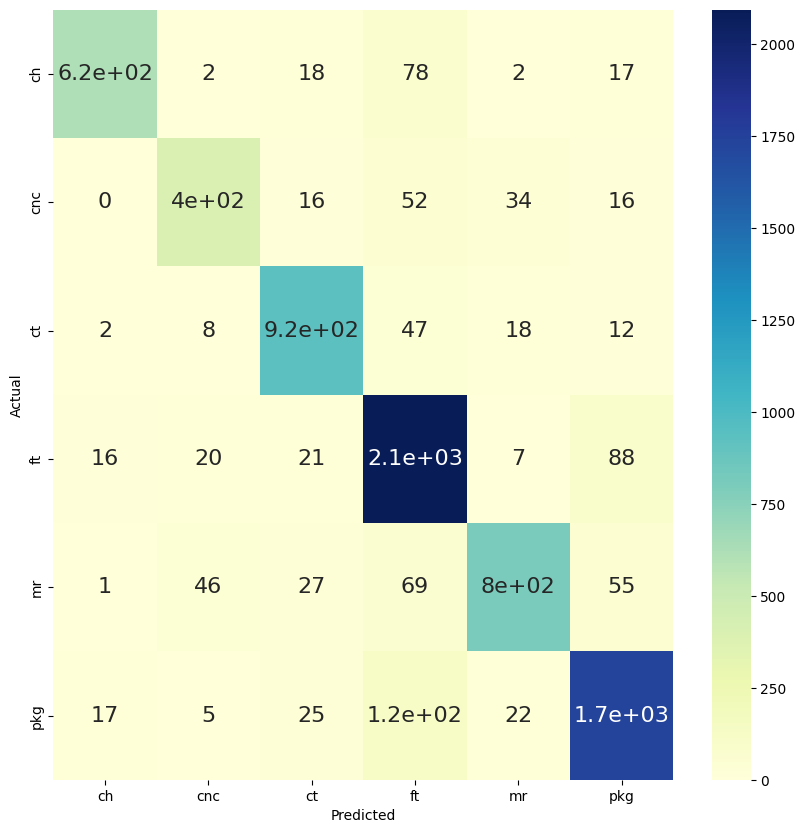

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred_svm)
df_cm = pd.DataFrame(conf_mat, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
seaborn.heatmap(df_cm,cmap= "YlGnBu", annot=True,annot_kws={"size": 16})

In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

          ch       0.95      0.84      0.89       738
         cnc       0.83      0.77      0.80       517
          ct       0.90      0.91      0.91      1012
          ft       0.85      0.93      0.89      2245
          mr       0.91      0.80      0.85      1003
         pkg       0.90      0.90      0.90      1924

    accuracy                           0.88      7439
   macro avg       0.89      0.86      0.87      7439
weighted avg       0.89      0.88      0.88      7439



# KNN

In [ ]:
parameters = {'n_neighbors':[3,4,5, 6, 7,10],
              'p':[1,2]
             }

clf = KNeighborsClassifier()
clf = GridSearchCV(clf, parameters, cv =5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 10], 'p': [1, 2]})

In [ ]:
print("Best cross-validation accuracy: {:.2f}".format(clf.best_score_))
print("Test set score: {:.2f}".format(clf.score(X_test, y_test)))
print("Best parameters: {}".format(clf.best_params_))

Best cross-validation accuracy: 0.58
Test set score: 0.60
Best parameters: {'n_neighbors': 10, 'p': 1}


In [ ]:
y_pred_knn = clf.predict(X_test)
for i, j in zip(y_test, y_pred_knn):
    print("actual:", i, " pred:", j)

Streaming output truncated to the last 5000 lines.
actual: ft  pred: ft
actual: pkg  pred: pkg
actual: ft  pred: pkg
actual: ft  pred: ft
actual: mr  pred: mr
actual: pkg  pred: pkg
actual: ft  pred: ft
actual: pkg  pred: ch
actual: ft  pred: ft
actual: ft  pred: ch
actual: ft  pred: ft
actual: ch  pred: ch
actual: pkg  pred: ch
actual: ct  pred: ct
actual: ct  pred: ct
actual: pkg  pred: pkg
actual: mr  pred: cnc
actual: pkg  pred: ct
actual: mr  pred: mr
actual: pkg  pred: ft
actual: ft  pred: ft
actual: ft  pred: ft
actual: ft  pred: ft
actual: ft  pred: ch
actual: pkg  pred: pkg
actual: pkg  pred: pkg
actual: mr  pred: mr
actual: mr  pred: ch
actual: ct  pred: ct
actual: ft  pred: ft
actual: ct  pred: ct
actual: pkg  pred: ft
actual: cnc  pred: cnc
actual: pkg  pred: pkg
actual: ft  pred: ft
actual: ft  pred: ch
actual: ft  pred: ft
actual: mr  pred: mr
actual: pkg  pred: pkg
actual: ft  pred: pkg
actual: pkg  pred: pkg
actual: pkg  pred: pkg
actual: mr  pred: mr
actual: pkg  pred:

<Axes: xlabel='Predicted', ylabel='Actual'>

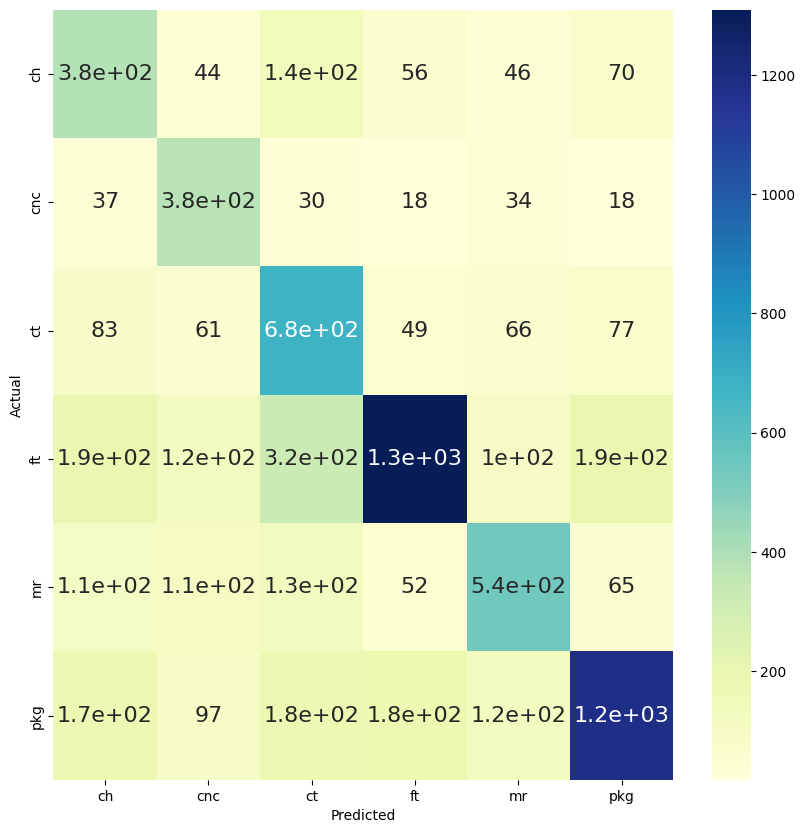

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred_knn)
df_cm = pd.DataFrame(conf_mat, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
seaborn.heatmap(df_cm,cmap= "YlGnBu", annot=True,annot_kws={"size": 16})

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

          ch       0.39      0.52      0.45       738
         cnc       0.46      0.74      0.57       517
          ct       0.46      0.67      0.54      1012
          ft       0.79      0.58      0.67      2245
          mr       0.59      0.54      0.56      1003
         pkg       0.74      0.61      0.67      1924

    accuracy                           0.60      7439
   macro avg       0.57      0.61      0.58      7439
weighted avg       0.64      0.60      0.61      7439



# LSTM


In [2]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.layers import Flatten
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
import keras

In [3]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [ ]:
len(y)

37195

In [4]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(df['label']).reshape(-1, 1))
# OneHotEncoder(handle_unknown='ignore')
y = enc.transform(np.array(df['label']).reshape(-1, 1)).toarray()
y

NameError: name 'np' is not defined

In [ ]:
X.shape

(37195,)

In [ ]:
num_classes = 6
n_most_common_words = 20396
maxlen = 111


tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~')
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = pad_sequences(sequences, maxlen=maxlen)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# X_train = sequence.pad_sequences(X_train, maxlen)
# X_test = sequence.pad_sequences(X_test, maxlen)

# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

Found 20451 unique tokens.


In [ ]:
epochs = 10
emb_dim = 128
batch_size = 256

In [ ]:
print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

model = Sequential()
model.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])



((29756, 111), (29756, 6), (7439, 111), (7439, 6))
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 111, 128)          2610688   
                                                                 
 spatial_dropout1d (Spatial  (None, 111, 128)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
Total params: 2660486 (10.15 MB)
Trainable params: 2660486 (10.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
93/93 [========

In [ ]:
import tensorflow as tf
print(tf.__version__)
import keras as kt
print(kt.__version__)

2.15.0
2.15.0


In [ ]:
model.fit(X_train, y_train, batch_size=100, epochs=3)

scores = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/3
298/298 [==============================] - 120s 402ms/step - loss: 0.2370 - acc: 0.9199
Epoch 2/3
298/298 [==============================] - 112s 375ms/step - loss: 0.2094 - acc: 0.9288
Epoch 3/3
233/233 [==============================] - 7s 28ms/step - loss: 0.3205 - acc: 0.8914
Accuracy: 89.14%


# Creating **Pipeline** for LSTM trained model and **inference**

In [1]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

model.save('phrase_model.keras')

NameError: name 'tokenizer' is not defined

In [ ]:

with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

def preprocess_text(text, tokenizer, maxlen):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=maxlen)
    return padded_sequence

In [ ]:
def predict_class(text, tokenizer, model, maxlen):
    preprocessed_text = preprocess_text(text, tokenizer, maxlen)
    prediction = model.predict(preprocessed_text)
    return prediction



In [ ]:
classes = ["ft",
           "mr",
           "ct",
           "pkg",
           "ch",
           "cnc"]
def decode_prediction(prediction, class_names):
    return class_names[np.argmax(prediction)]

In [ ]:
new_text = "Man sieht nur das, was man weiß"
maxlen =  111
prediction = predict_class(new_text, tokenizer, model, maxlen)
predicted_class = decode_prediction(prediction, class_names)
print(prediction)
print(f"The predicted class for the text '{new_text}' is: {predicted_class}")

1/1 [==============================] - 0s 61ms/step
[[7.21072173e-03 2.60898890e-03 7.96158507e-04 9.75593448e-01
  1.41495827e-03 1.23757785e-02]]
The predicted class for the text 'halo wie gehts' is: class4
